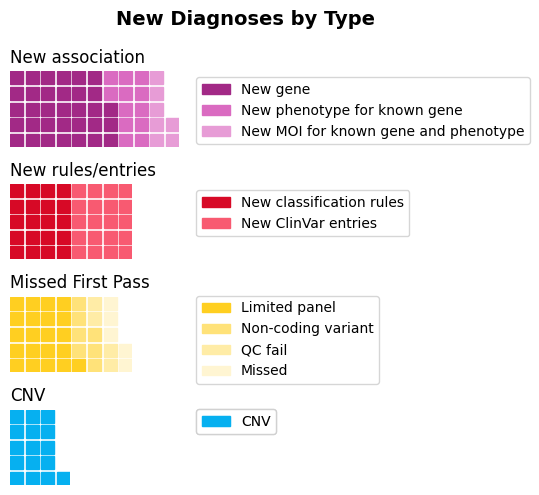

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from pywaffle import Waffle

solve_data = {'New gene': 33,
        'New phenotype for known gene': 12,
        'New MOI for known gene and phenotype': 7,
        'New classification rules': 20,
        'New ClinVar entries': 20,
        'Limited panel': 21,
        'Non-coding variant': 7,
        'QC fail': 4,
        'Missed': 5,
        'CNV': 16}
data = pd.DataFrame(
    {
        'labels': ['New gene', 
            'New phenotype for known gene',
            'New MOI for known gene and phenotype',
            'New classification rules',
            'New ClinVar entries',
            'Limited panel',
            'Non-coding variant',
            'QC fail', 
            'Missed',
            'CNV'],
            'New association': [33, 12, 7, 0, 0, 0, 0, 0, 0, 0],
            'New rules/entries': [0, 0, 0, 20, 20, 0, 0, 0, 0, 0],
            'Missed First Pass': [0, 0, 0, 0, 0, 21, 7, 4, 5, 0],
            'CNV': [0, 0, 0, 0, 0, 0, 0, 0, 0, 16],
    },
).set_index('labels')

colors_list = ['#a22986', 
        '#da6bc1',
        '#e79cd6',
        '#d70926',
        '#f85a71',
        '#ffcf21',
        '#ffe279',
        '#ffeca6', 
        '#fff5d2',
        '#06b0f0']

#print([f"{k} ({v})" for k, v in data['New association'].items()][0:3])

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        411: {
            'values': data['New association'],
            'title': {'label': 'New association', 'loc': 'left', 'fontsize': 12}
        },
        412: {
            'values': data['New rules/entries'],
            'title': {'label': 'New rules/entries', 'loc': 'left', 'fontsize': 12}
        },
        413: {
            'values': data['Missed First Pass'],
            'title': {'label': 'Missed First Pass', 'loc': 'left', 'fontsize': 12}
        },
        414: {
            'values': data['CNV'],
            'title': {'label': 'CNV', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,
    colors=colors_list,
    rounding_rule='ceil',
    figsize=(5, 5)
)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

patches = []
for x in range(len(solve_data)):
    patches.append(mpatches.Patch(color=colors_list[x], label=list(solve_data.keys())[x]))
plt.legend(handles=patches, bbox_to_anchor=(3,2), loc="lower left")

legend1 = plt.legend(handles=patches[0:3], bbox_to_anchor=(3,5.5), loc="upper left")
legend2 = plt.legend(handles=patches[3:5], bbox_to_anchor=(3,4), loc="upper left")
legend3 = plt.legend(handles=patches[5:9], bbox_to_anchor=(3,2.6), loc="upper left")
legend4 = plt.legend(handles=patches[9:10], bbox_to_anchor=(3,1.1), loc="upper left")
fig.add_artist(legend1)
fig.add_artist(legend2)
fig.add_artist(legend3)
fig.add_artist(legend4)

fig.suptitle('New Diagnoses by Type', fontsize=14, fontweight='bold')
fig.savefig('../../Figures/Fig4/Fig4_panel2.png')